In [8]:
import sys
import gym
import random
import numpy as np
from time import sleep
from collections import deque
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential
import matplotlib.pyplot as plt

In [9]:
#Defino Agente
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.render = False

        #Tamaños de estados y acciones
        self.state_size = state_size
        self.action_size = action_size

        #Constantes
        self.discount_factor = 0.99
        self.learning_rate = 0.001
        self.epsilon = 1
        self.epsilon_decay = 0.975
        self.batch_size = 64
        self.tau = 0.01

        #Construyo ambos modelos
        self.model = self.build_model()
        self.target_model = self.build_model()

        #Primer update (no es necesario)
        self.update_target_model()

    #Construyo modelo
    def build_model(self):
        model = Sequential()
        model.add(Dense(64, input_dim=self.state_size, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(64, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(self.action_size, activation='linear',
                        kernel_initializer='he_uniform'))
        model.summary()
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    #Como es el soft update del modelo
    def update_target_model(self):
        weights = self.model.get_weights() #pesos del modelo original
        target_weights = self.target_model.get_weights() #pesos del modelo auxiliar

        for i in range(len(target_weights)):
            target_weights[i] = weights[i] * self.tau + target_weights[i] * (1 - self.tau) #actualizo SOFT los pesos del modelo aux
        
        self.target_model.set_weights(target_weights)


    #Actua
    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            q_value = self.model.predict(state, verbose = 0)
            return np.argmax(q_value[0])


In [10]:
#Defino agente
agent = DQNAgent(8,4)
#Cargo los pesos del modelo
pesos_099 = agent.model.load_weights('DQN_MP_epsD_099_gamma_099.hdf5')
pesos_09995 = agent.model.load_weights('DQN_MP_epsD_09995_gamma_099.hdf5')
pesos_0995 = agent.model.load_weights('DQN_MP_epsD_0995_gamma_099.hdf5')
pesos_0975 = agent.model.load_weights('DQN_MP_epsD_0975_gamma_099.hdf5')
#Cargo scores
scores_099 = np.load('scores_epsD_099_gamma_099.npy')
scores_09995 = np.load('scores_epsD_09995_gamma_099.npy')
scores_0995 = np.load('scores_epsD_0995_gamma_099.npy')
scores_0975 = np.load('scores_epsD_0975_gamma_099.npy')


scores_0995_gamma0995 = np.load('scores_epsD_0995_gamma_0995.npy')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                576       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 4)                 260       
                                                                 
Total params: 4,996
Trainable params: 4,996
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                576       
                                                                 
 dense_16 (Dense)            (

In [11]:
# Funcion del epsilon_decay
epsilons_099 = [0.99**i for i in range(len(scores_099)) if 0.99**i>0.01]
print(epsilons_099[1])

epsilons_09995 = [0.9995**i for i in range(len(scores_09995)) if 0.9995**i>0.01]
print(epsilons_09995[1])

epsilons_0995 = [0.995**i for i in range(len(scores_0995)) if 0.995**i>0.01]
print(epsilons_0995[1])

epsilons_0975 = [0.975**i for i in range(len(scores_0975)) if 0.975**i>0.01]
print(epsilons_0975[1])

epsilons_0995_gamma0995 =[0.995**i for i in range(len(scores_0995_gamma0995)) if 0.995**i>0.01]
print(epsilons_0995_gamma0995[1])

0.99
0.9995
0.995
0.975
0.995


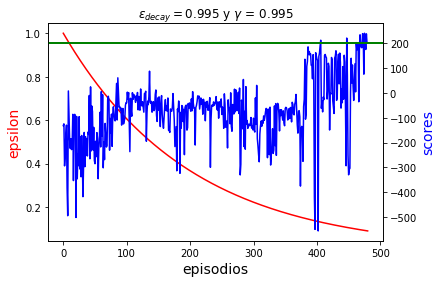

In [12]:
fig,ax = plt.subplots()
# make a plot
ax.plot(epsilons_0995_gamma0995,color="red")
# set x-axis label
ax.set_xlabel("episodios", fontsize = 14)
# set y-axis label
ax.set_ylabel("epsilon",color="red",fontsize = 14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(scores_0995_gamma0995,color="blue")
ax2.set_ylabel("scores",color="blue",fontsize=14)
plt.axhline(y = 200,linewidth=2, color='g')
plt.title(r'$\varepsilon_{decay}=0.995$'+" y"" $\gamma$ = 0.995")
plt.show()
# save the plot as a file
#fig.savefig('epsilon_decay0.975gamma0.99.jpg',format='jpeg',dpi=100, bbox_inches='tight')


Text(0.5, 1.0, '$\\epsilon_{decay}=0.995$$\\gamma$ = 0.995 Ventana de: 50')

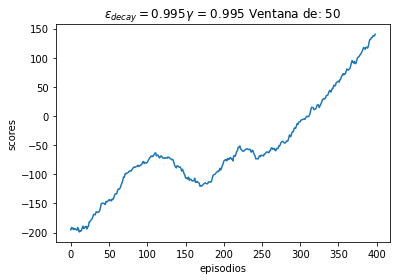

In [13]:
#Gráfico de media de ventana de 50 episodios
plt.plot([np.mean(scores_0995[i:(50+i)]) for i in range(len(scores_0995)-50)])#, label='\varepsilon_{decay}=0.99')
#plt.plot([np.mean(scores_09995[i:(50+i)]) for i in range(len(scores_09995)-50)])#, label='\varepsilon_{decay}=0.9995')
#plt.plot([np.mean(scores_0995[i:(50+i)]) for i in range(len(scores_0995)-50)])#, label='\varepsilon_{decay}=0.995')
#plt.plot([np.mean(scores_0975[i:(50+i)]) for i in range(len(scores_0975)-50)])#,label='\varepsilon_{decay}=0.975')
plt.xlabel('episodios')
plt.ylabel('scores')
plt.title("$\epsilon_{decay}=0.995$"+"$\gamma$ = 0.995"+" Ventana de: 50")
#fig.savefig('PromedioVentanaepsilon_decay0.975gamma0.99.jpg',format='jpeg',dpi=100, bbox_inches='tight')
#plt.legend([r'$\varepsilon_{decay}=0.99$',r'$\varepsilon_{decay}=0.995$',r'$\varepsilon_{decay}=0.975$']
#           ,loc ="lower right")

Text(0.5, 1.0, '$\\gamma$ = 0.99 Ventana de: 50')

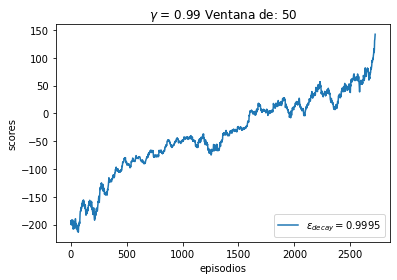

In [22]:
plt.plot([np.mean(scores_09995[i:(50+i)]) for i in range(len(scores_09995)-50)])#, label='\varepsilon_{decay}=0.9995'
plt.legend([r'$\varepsilon_{decay}=0.9995$'],loc ="lower right")
plt.xlabel('episodios')
plt.ylabel('scores')
plt.title("$\gamma$ = 0.99"+" Ventana de: 50")

In [30]:
env = gym.make('LunarLander-v2')
state_size = env.observation_space.shape[0]
#Fijo el epsilon para que actúe, se puede poner 0 y que actúe sin azar.
agent.epsilon = 0.01

for i in range(2):
    state = env.reset(seed=42)
    for j in range(900):
        state = np.reshape(state, [1, state_size])
        action = agent.get_action(state)
        env.render()
        state, reward, done, _ = env.step(action)
        if done:
            break 
            
env.close()

In [24]:
env.reset()
state = env.reset(seed = 42)
for step in range(200):
    state = np.reshape(state, [1, state_size])
    obs, reward, done, info = env.step(agent.get_action(state))
    #print(reward)
env.close()

TypeError: LunarLander.reset() got an unexpected keyword argument 'seed'